In [2]:
import numpy as np
import pandas as pd
#import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import autocorrelation_plot, scatter_matrix
from pandas import DataFrame, Series

#import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import scipy, scipy.stats
%matplotlib inline
sns.set()

from sklearn.preprocessing import PolynomialFeatures


# Data Cleaning

# Check the whole table.

In [3]:
df = pd.read_csv('Madrid_traffic_data_04_2019.csv')

In [4]:
df

,id,pp_from_x,pp_to_x,pp_osmstartnodeid,pp_osmendnodeid,speed,hour,day,month,maxspeed,length,lanes,q,k,speed_kph_mean,speed_kph_stddev
0,1001,21702026,315518315,21702026,315518315,58.50,8.0,1.0,4.0,70.0,525.972,3.0,4446.0,13.00,61.617,4.141
1,1001,21702026,315518315,21702026,315518315,58.50,8.0,1.0,4.0,70.0,525.972,3.0,4446.0,13.00,61.617,4.141
2,1001,21702026,315518315,21702026,315518315,59.75,10.0,1.0,4.0,70.0,525.972,3.0,3237.0,9.75,62.950,4.365
3,1001,21702026,315518315,21702026,315518315,59.75,10.0,1.0,4.0,70.0,525.972,3.0,3237.0,9.75,62.950,4.365
4,1001,21702026,315518315,21702026,315518315,57.00,11.0,1.0,4.0,70.0,525.972,3.0,2358.0,7.50,59.780,3.947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032475,10269,1137265017,25686456,25686450,25686456,54.00,16.0,30.0,4.0,50.0,516.265,1.5,211.0,2.00,58.654,10.015
1032476,10269,1137265017,25686456,1137265017,25686450,51.00,20.0,30.0,4.0,50.0,516.265,1.5,213.0,2.25,57.292,12.639
1032477,10269,1137265017,25686456,1137265017,25686450,51.00,20.0,30.0,4.0,50.0,516.265,1.5,213.0,2.25,57.292,12.639
1032478,10269,1137265017,25686456,25686450,25686456,51.00,20.0,30.0,4.0,50.0,516.265,1.5,213.0,2.25,64.158,12.744


Check the month variable

In [5]:
df['month']. unique()

array([4.])

#  Drop the static variables 

We only use the dynamnic variables. We also drop the month from dynamic variables because it contains the same value. It is 4.0

In [6]:
d= df.drop(['id', 'pp_from_x', 'pp_to_x', 'pp_osmstartnodeid','pp_osmendnodeid','lanes', 'length', 'speed','maxspeed','month'], axis=1)

In [7]:
d

,hour,day,q,k,speed_kph_mean,speed_kph_stddev
0,8.0,1.0,4446.0,13.00,61.617,4.141
1,8.0,1.0,4446.0,13.00,61.617,4.141
2,10.0,1.0,3237.0,9.75,62.950,4.365
3,10.0,1.0,3237.0,9.75,62.950,4.365
4,11.0,1.0,2358.0,7.50,59.780,3.947
...,...,...,...,...,...,...
1032475,16.0,30.0,211.0,2.00,58.654,10.015
1032476,20.0,30.0,213.0,2.25,57.292,12.639
1032477,20.0,30.0,213.0,2.25,57.292,12.639
1032478,20.0,30.0,213.0,2.25,64.158,12.744


In [12]:
d['day']. unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30.])

In [13]:
d['hour']. unique()

array([ 8., 10., 11., 12., 13., 15., 16., 17., 18., 22.,  9., 19.,  6.,
       21., 14., 20.,  0.,  1.,  4., 23.,  2.,  3.,  7.,  5.])

In [10]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032480 entries, 0 to 1032479
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   hour              1032480 non-null  float64
 1   day               1032480 non-null  float64
 2   q                 1032480 non-null  float64
 3   k                 1032046 non-null  float64
 4   speed_kph_mean    1032480 non-null  float64
 5   speed_kph_stddev  1032480 non-null  float64
dtypes: float64(6)
memory usage: 47.3 MB


In [14]:
d.describe()

,hour,day,q,k,speed_kph_mean,speed_kph_stddev
count,1.032480e+06,1.032480e+06,1.032480e+06,1.032046e+06,1.032480e+06,1.032480e+06
mean,1.266903e+01,1.527768e+01,2.517388e+03,6.790175e+00,7.867139e+01,9.942153e+00
std,6.656633e+00,8.748781e+00,1.673374e+03,6.172311e+00,1.166686e+01,4.962780e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.419000e+00,2.570000e-01
25%,8.000000e+00,7.000000e+00,1.038000e+03,2.500000e+00,7.497475e+01,6.646000e+00
50%,1.300000e+01,1.400000e+01,2.426000e+03,5.500000e+00,8.096100e+01,8.779000e+00
75%,1.800000e+01,2.300000e+01,3.698000e+03,9.000000e+00,8.544100e+01,1.196100e+01
max,2.300000e+01,3.000000e+01,8.371667e+03,8.325000e+01,1.398080e+02,5.900100e+01


# Check the missing values

In [15]:
d.isna().sum()

hour                  0
day                   0
q                     0
k                   434
speed_kph_mean        0
speed_kph_stddev      0
dtype: int64

Missing values in percentage

In [16]:
missing = pd.DataFrame(d.isna().sum() / d.isna().count() * 100).rename(columns={0:'% missing'}).sort_values(by='% missing', ascending=False)
missing.loc[~(missing==0).all(axis=1)]

,% missing
k,0.042035


Drop the rows which have the missing value.

In [17]:
d.dropna(inplace=True)
print(d.isnull().sum())

hour                0
day                 0
q                   0
k                   0
speed_kph_mean      0
speed_kph_stddev    0
dtype: int64


# Drop the duplicated values on the dataset

In [18]:
d.duplicated().sum()

803611

We drop the rows which have duplicate value.

In [19]:
df_madrid= d.drop_duplicates()

In [20]:
df_madrid

,hour,day,q,k,speed_kph_mean,speed_kph_stddev
0,8.0,1.0,4446.00,13.00,61.617,4.141
2,10.0,1.0,3237.00,9.75,62.950,4.365
4,11.0,1.0,2358.00,7.50,59.780,3.947
6,12.0,1.0,2058.00,7.00,50.257,22.750
8,13.0,1.0,1965.00,7.75,66.147,9.310
...,...,...,...,...,...,...
1032470,14.0,30.0,254.75,2.00,51.592,14.993
1032472,16.0,30.0,211.00,2.00,58.321,16.498
1032474,16.0,30.0,211.00,2.00,58.654,10.015
1032476,20.0,30.0,213.00,2.25,57.292,12.639


In [22]:
df_madrid['hour'].unique()

array([ 8., 10., 11., 12., 13., 15., 16., 17., 18., 22.,  9., 19.,  6.,
       21., 14., 20.,  0.,  1.,  4., 23.,  2.,  3.,  7.,  5.])

# Data Exploration

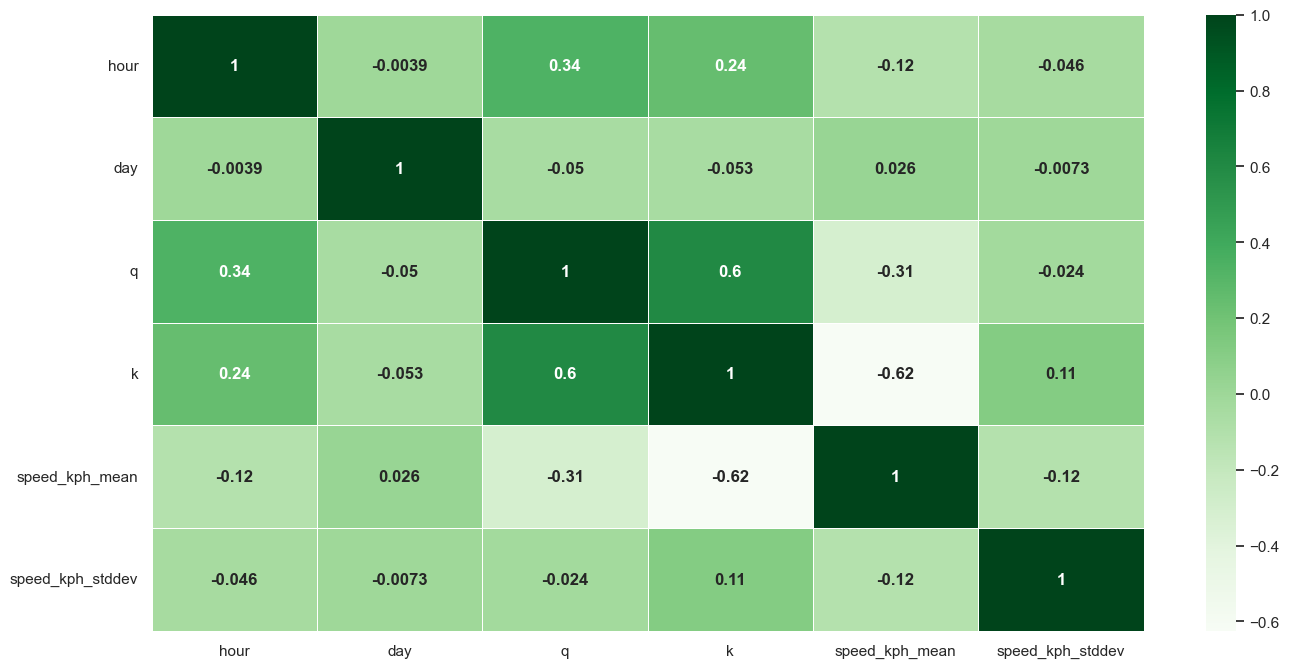

In [21]:
plt.figure(figsize=(16, 8))
sns.heatmap(df_madrid.corr(), annot_kws={'weight':'bold'},linewidths=.5, cmap="Greens", annot=True)
plt.savefig("heatmap.png")

<AxesSubplot:ylabel='hour'>

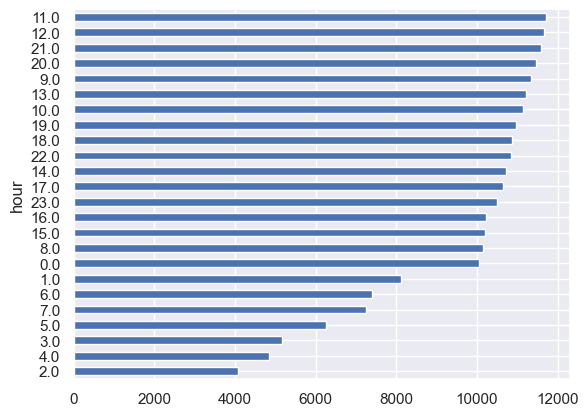

In [25]:
df_madrid['hour'].value_counts().sort_values().plot(ylabel= 'hour',kind='barh')

<AxesSubplot:ylabel='hour'>

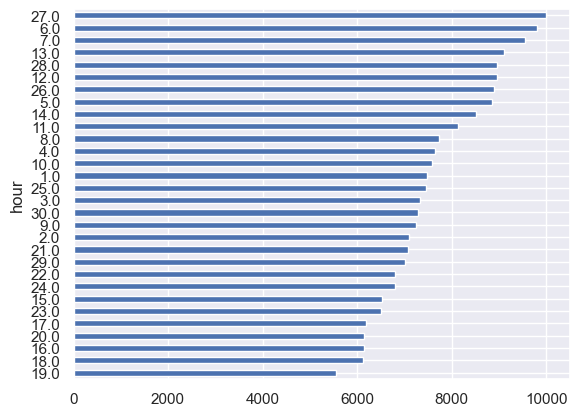

In [26]:
df_madrid['day'].value_counts().sort_values().plot(ylabel= 'hour',kind='barh')

<AxesSubplot:xlabel='q', ylabel='Count'>

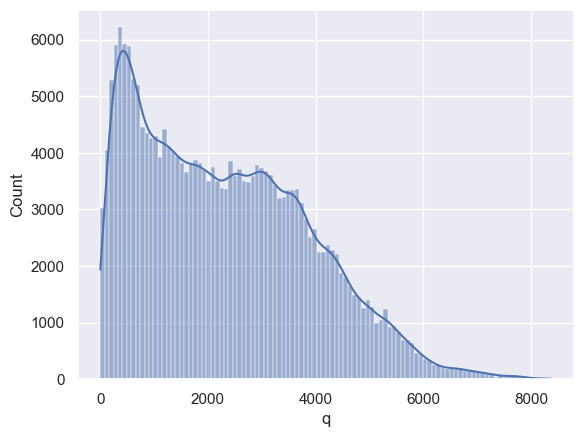

In [31]:
sns.histplot(df_madrid["q"], kde=True)

<AxesSubplot:xlabel='k', ylabel='Count'>

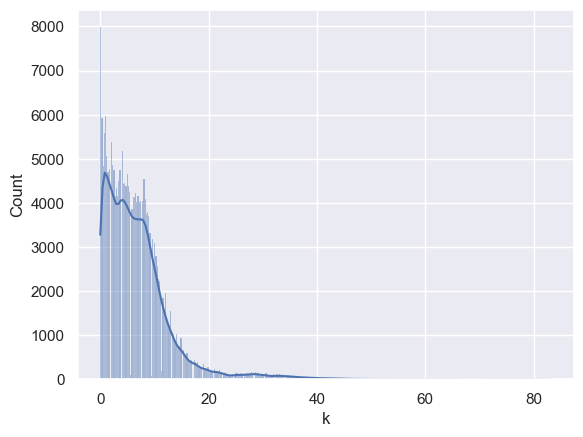

In [32]:
sns.histplot(df_madrid["k"], kde=True)

<AxesSubplot:xlabel='speed_kph_mean', ylabel='Count'>

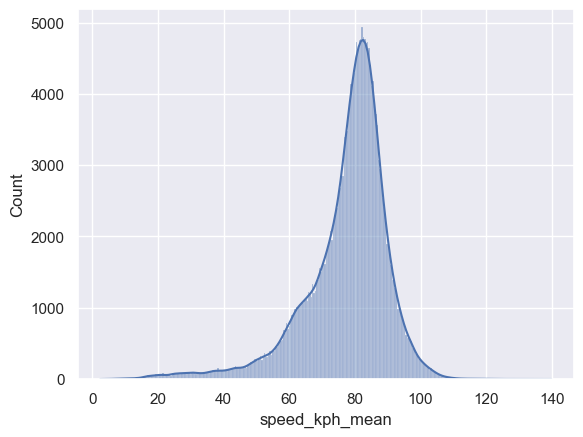

In [33]:
sns.histplot(df_madrid["speed_kph_mean"], kde=True)

<AxesSubplot:xlabel='speed_kph_stddev', ylabel='Count'>

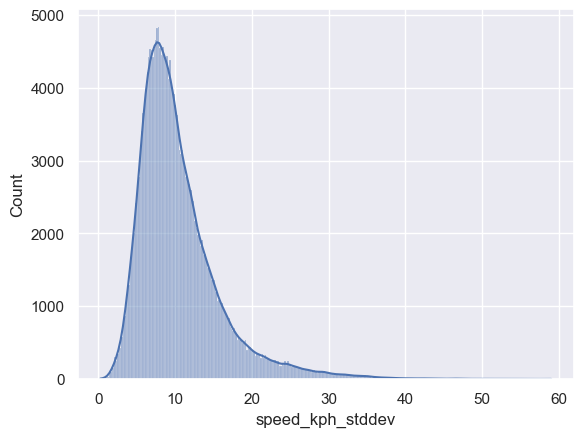

In [34]:
sns.histplot(df_madrid["speed_kph_stddev"], kde=True)

1. The relaton between q and k

In [40]:
x = df_madrid.iloc[:, 3:4].values
#x_matrix = x.values.reshape(-1,1) # to make matrix representation
y = df_madrid.iloc[:, 2].values

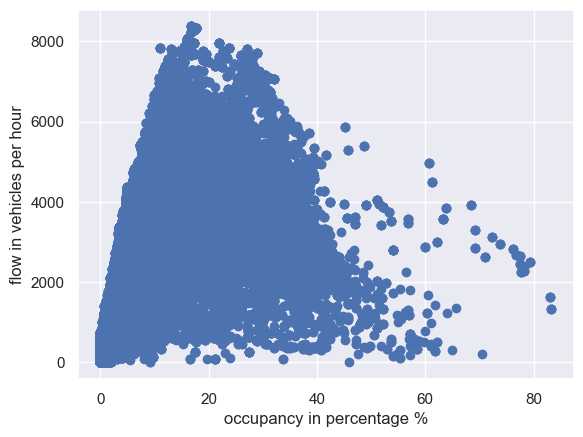

In [41]:
def viz_polymonial():
    plt.scatter(x, y)
    #plt.plot(x, lin2.predict(poly_reg.fit_transform(x)), color='blue')
    plt.xlabel('occupancy in percentage %')
    plt.ylabel('flow in vehicles per hour')
    plt.show()
    return
viz_polymonial()

2. The relation between speed_kph_mean and k

In [42]:
x_k= df_madrid.iloc[:, 3:4].values
y_speed = df_madrid.iloc[:, 4].values

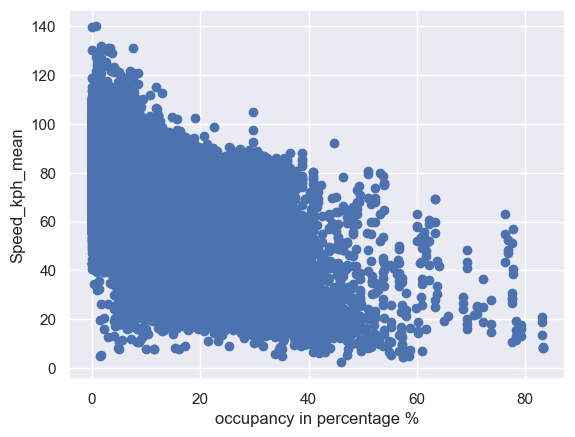

In [43]:
plt.scatter(x_k,y_speed)
plt.xlabel('occupancy in percentage %')
plt.ylabel('Speed_kph_mean')
plt.show()  

3. The relation between speed_kph_mean and q

In [44]:
x_q= df_madrid.iloc[:, 2:3].values
y_speed = df_madrid.iloc[:, 4].values

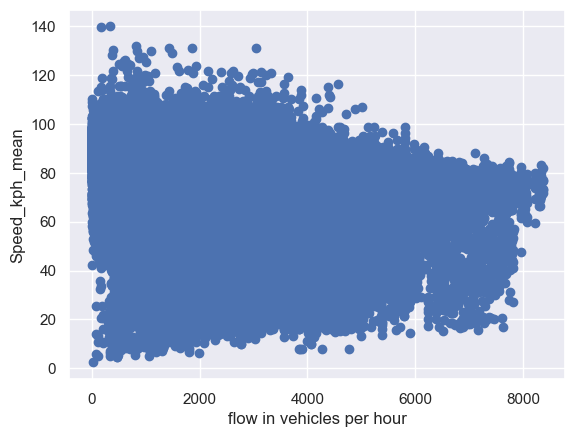

In [45]:
plt.scatter(x_q,y_speed)
plt.xlabel('flow in vehicles per hour')
plt.ylabel('Speed_kph_mean')
plt.show() 

4. The relation between q and hour

In [28]:
#x_hour= d.iloc[:, 0:1].values
#y_q = d.iloc[:, 2].values

In [46]:
#plt.scatter(x_hour,y_q)
#plt.xlabel('hour')
#plt.ylabel('q')
#plt.show() 

5. The rlation between q and day

In [30]:
#x_day= d.iloc[:, 1:2].values
#y_q = d.iloc[:, 2].values

In [47]:
#plt.scatter(x_day,y_q)
#plt.xlabel('day')
#plt.ylabel('flow in vehicles per hour')
#plt.show() 

6. The relation between hour vs day

In [32]:
#x_hour= d.iloc[:, 0:1].values
#y_day = d.iloc[:, 1].values

In [48]:
#plt.scatter(x_hour,y_day)
#plt.xlabel('hour')
#plt.ylabel('day')
#plt.show() 

7. speed mean vs speed std deviation

In [49]:
X = df_madrid[['speed_kph_mean', 'speed_kph_stddev']]

Text(0, 0.5, 'speed_kph_stddev')

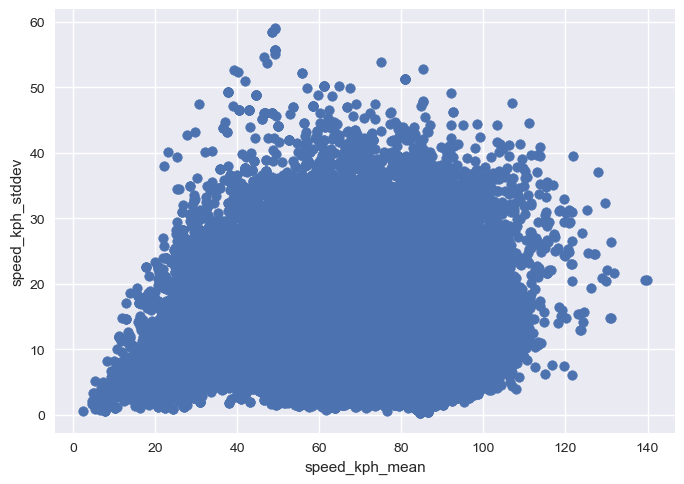

In [50]:
plt.close()
plt.style.use('seaborn')
plt.scatter(X['speed_kph_mean'], X['speed_kph_stddev'])
plt.xlabel('speed_kph_mean')
plt.ylabel('speed_kph_stddev')

# Clustering by K Mean

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans

In [53]:
def pca_embeddings(df_madrid):
    
    pca_2 = PCA(n_components=2)
    pca_2_result = pca_2.fit_transform(df_madrid)
    print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
    print('Cumulative variance explained by 2 principal components: {:.2%}'.format(
        np.sum(pca_2.explained_variance_ratio_)))

    # Results from pca.components_
    dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=df_madrid.columns, index=['PC_1', 'PC_2'])
    print('\n\n', dataset_pca)
    
    print("\n*************** Most important features *************************")
    print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.3].iloc[0]).dropna())
    print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.3].iloc[1]).dropna())
    print("\n******************************************************************")

    return pca_2_result, pca_2

In [54]:
def kmean_hyper_param_tuning(df_madrid):
    """
    Hyper parameter tuning to select the best from all the parameters on the basis of silhouette_score.
    :param data: dimensionality reduced data after applying PCA
    :return: best number of clusters for the model (used for KMeans n_clusters)
    """
    # candidate values for our number of cluster
    parameters = [2, 3, 4, 5]

    # instantiating ParameterGrid, pass number of clusters as input
    parameter_grid = ParameterGrid({'n_clusters': parameters})

    best_score = -1
    kmeans_model = KMeans()     # instantiating KMeans model
    silhouette_scores = []

    # evaluation based on silhouette_score
    for p in parameter_grid:
        kmeans_model.set_params(**p)    # set current hyper parameter
        kmeans_model.fit(df_madrid)          # fit model on wine dataset, this will find clusters based on parameter p

        ss = metrics.silhouette_score(df_madrid, kmeans_model.labels_)   # calculate silhouette_score
        silhouette_scores += [ss]       # store all the scores

        print('Parameter:', p, 'Score', ss)

        # check p which has the best score
        if ss > best_score:
            best_score = ss
            best_grid = p

    # plotting silhouette score
    plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
    plt.xticks(range(len(silhouette_scores)), list(parameters))
    plt.title('Silhouette Score', fontweight='bold')
    plt.xlabel('Number of Clusters')
    plt.show()

    return best_grid['n_clusters']

In [55]:
def visualizing_results(pca_result, label, centroids_pca):
    """ Visualizing the clusters
    :param pca_result: PCA applied data
    :param label: K Means labels
    :param centroids_pca: PCA format K Means centroids
    """
    # ------------------ Using Matplotlib for plotting-----------------------
    x = pca_result[:, 0]
    y = pca_result[:, 1]

    plt.scatter(x, y, c=label, alpha=0.5, s=200)  # plot different colors per cluster
    plt.title('Traffic flow Paris')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')

    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, linewidths=1.5,
                color='red', edgecolors="black", lw=1.5)

    plt.show()



2. Reducing via PCA

Explained variation per principal component: [9.99872893e-01 6.33950966e-05]
Cumulative variance explained by 2 principal components: 99.99%


           hour       day         q         k  speed_kph_mean  speed_kph_stddev
PC_1  0.001404  0.000278  0.999993  0.002442        0.002533          0.000080
PC_2  0.010736  0.017276  0.003092  0.262188        0.962184          0.070957

*************** Most important features *************************
As per PC 1:
 q    0.999993
Name: PC_1, dtype: float64


As per PC 2:
 speed_kph_mean    0.962184
Name: PC_2, dtype: float64

******************************************************************


3. HyperTuning the Parameter for KMeans

Parameter: {'n_clusters': 2} Score 0.613351395732167
Parameter: {'n_clusters': 3} Score 0.5805357280856354
Parameter: {'n_clusters': 4} Score 0.5647519680360404
Parameter: {'n_clusters': 5} Score 0.5584146475373585


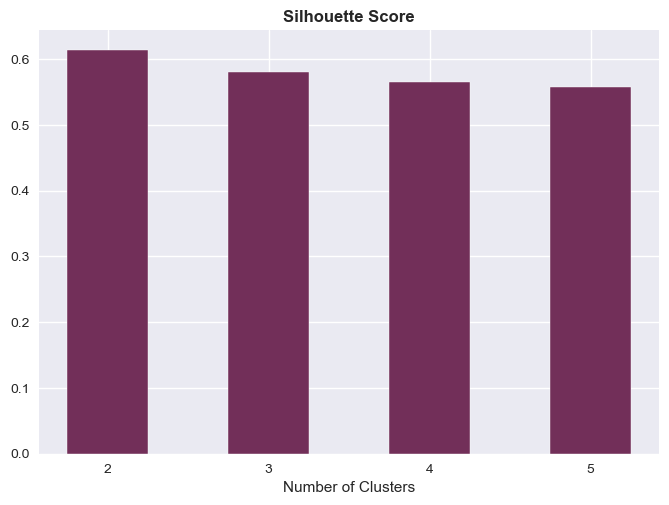

optimum num of clusters = 2


NameError: name 'df_madird' is not defined

In [56]:
print("\n\n2. Reducing via PCA\n")
pca_result, pca_2 = pca_embeddings(df_madrid)

print("\n\n3. HyperTuning the Parameter for KMeans\n")
optimum_num_clusters = kmean_hyper_param_tuning(df_madrid)
print("optimum num of clusters =", optimum_num_clusters)
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_madrid)
centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)



C:\Users\IdeaPad\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(




4. Visualizing the data


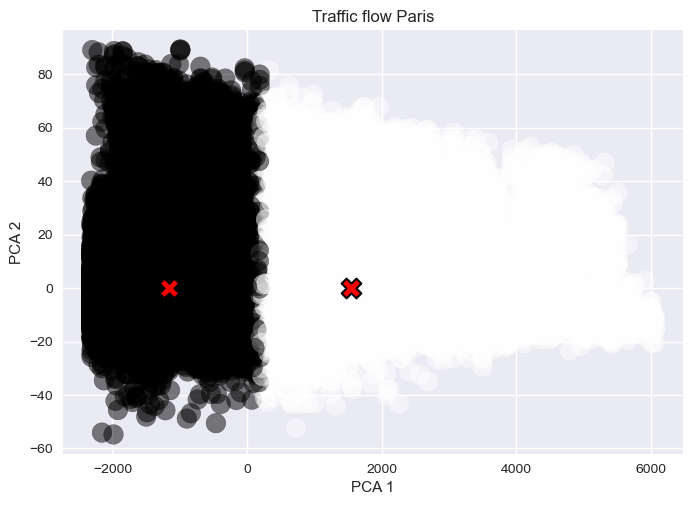

In [57]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_madrid)
centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)
print("\n\n4. Visualizing the data")
visualizing_results(pca_result, kmeans.labels_, centroids_pca)